# Amazon Product Reviews Sentiment Analysis with Python

In this notebook will be exploted three different approaches to perform sentiment analysis on Amazon reviews.
* Firstly, will be conducted an analysis aimed to understand which is the feeling that occurs more frequently from the customers' reviews. 
* Secondly, will be performed a Logistic regression classification aimed to detect from the reviews if the customers are satisfied or not
* Thirdly, will be created a world cloud plot both for positive reviews and negatives ones. This kind of plot is useful to make a qualitative analysis on the most occuring words used in the reviews. 

## 1st Approach

### Setup

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


### Preliminary Data Exploration

In [3]:
sentiments = SentimentIntensityAnalyzer()

In [4]:
data = pd.read_excel('E:/webscraping/Reviews/Toaster-reviews.xlsx')

In [5]:
data.head()

,product,title,rating,data,body
0,Philips Daily Collection ‎HD2581/90 Tostapane...,È stato amore a prima vista,5,6 giugno 2021,"È veramente eccezionale, l'ho usato per toglie..."
1,Philips Daily Collection ‎HD2581/90 Tostapane...,tostapane che fa il suo lavoro.,5,16 ottobre 2021,premessa: a tutti coloro che chiedono a questo...
2,Philips Daily Collection ‎HD2581/90 Tostapane...,Assolutamente NO per toast farciti!,1,4 novembre 2020,Il prodotto non è conforme a quanto atteso. Pr...
3,Philips Daily Collection ‎HD2581/90 Tostapane...,promosso,4,21 agosto 2018,"Arriva nella sua scatola, ben confezionato con..."
4,Philips Daily Collection ‎HD2581/90 Tostapane...,Il prossimo lo compro con le pinze,3,15 novembre 2020,Il tostapane funziona bene la temperatura è re...


In [6]:
print(data.describe())

          rating
count  90.000000
mean    4.000000
std     1.382068
min     1.000000
25%     3.250000
50%     5.000000
75%     5.000000
max     5.000000


In [7]:
# This is not the case but it is always a good practice to check for nas and drop them
data.dropna(inplace = True)

The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon:

In [8]:
ratings = data['rating'].value_counts()

In [9]:
ratings

5    49
4    18
1    10
3     7
2     6
Name: rating, dtype: int64

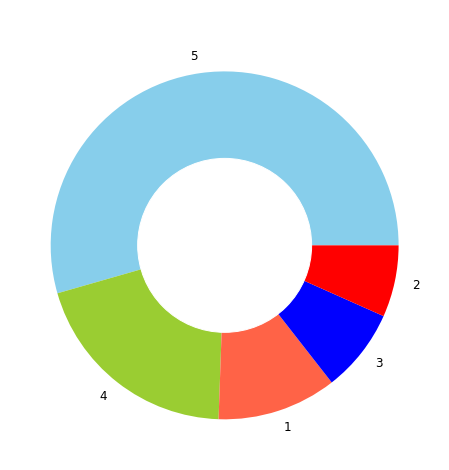

In [47]:
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
#central_circle = plt.Circle((0, 0), 0.5, color='black')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
title_obj = plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.setp(title_obj, color='white')
plt.show()


In [11]:
! pip install plotly

In [12]:
import plotly.graph_objects as go

In [13]:
new_numbers = []
for n in numbers: 
    new_numbers.append(str(n)+ ' stars')

In [14]:
fig = go.Figure(data=[go.Pie(labels=new_numbers, values=quantity, hole=.3)])
fig.update_layout(title_text='Ratings\' distribution')
fig.show()

### Sentiment analysis

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

In [15]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["body"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["body"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["body"]]
print(data.head())

                                             product  \
0   Philips Daily Collection ‎HD2581/90 Tostapane...   
1   Philips Daily Collection ‎HD2581/90 Tostapane...   
2   Philips Daily Collection ‎HD2581/90 Tostapane...   
3   Philips Daily Collection ‎HD2581/90 Tostapane...   
4   Philips Daily Collection ‎HD2581/90 Tostapane...   

                                 title  rating              data  \
0          È stato amore a prima vista       5     6 giugno 2021   
1      tostapane che fa il suo lavoro.       5   16 ottobre 2021   
2  Assolutamente NO per toast farciti!       1   4 novembre 2020   
3                             promosso       4    21 agosto 2018   
4   Il prossimo lo compro con le pinze       3  15 novembre 2020   

                                                body  Positive  Negative  \
0  È veramente eccezionale, l'ho usato per toglie...     0.020     0.000   
1  premessa: a tutti coloro che chiedono a questo...     0.000     0.000   
2  Il prodotto non è confo

Now let’s see how most people rated the products they bought from Amazon:

In [16]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So, most people are neutral when submitting their experiences with the products they have purchased from Amazon. Now let’s see the total of all sentiment scores:

In [17]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1.2149999999999999
Negative:  1.203
Neutral:  87.58299999999998


Almost any review is classified as neutral. 
<br>
From a bussines pov, this is not very useful becasue it is difficult to understand if people really like the product or not. 
However, this result can also be interpreted differently. A toaster is typically a cheap product, it is used quite frequently in the daily life and it satisfies a quite easy task (tosting bread). Thus, it is possible to hypothesize that even the nature of the product affects the results. A toaster is not that exciting. On the other hand, books' reviews are extremely personal and they allow to customers to express easily and better their 'feeling' while writing their reviews. 

## 2nd Approach

### Intro

In this second analysis a different approach will be used: classify bad and good reviews. 
<br>
Ratings typically go from 1 to 5. Hence, 3 is a middle value value which can be considered neither good nor bad. Just average. So, aveerage reviews can be dropped out. 

In [18]:
data = pd.read_excel('E:/webscraping/Reviews/Toaster-reviews.xlsx')

In [19]:
data.columns

Index(['product', 'title', 'rating', 'data', 'body'], dtype='object')

In [20]:
data = data[data['rating'] != 3]

Now it is possible to assign a label (a class) to each observation according to the rating. 
Positive sentiments will be denoted as 1 and negative as 0. 

In [21]:
def sentiment(n):
    return 1 if n >= 4 else 0

In [22]:
data['sentiment'] = data['rating'].apply(sentiment)

In [23]:
data.head()

,product,title,rating,data,body,sentiment
0,Philips Daily Collection ‎HD2581/90 Tostapane...,È stato amore a prima vista,5,6 giugno 2021,"È veramente eccezionale, l'ho usato per toglie...",1
1,Philips Daily Collection ‎HD2581/90 Tostapane...,tostapane che fa il suo lavoro.,5,16 ottobre 2021,premessa: a tutti coloro che chiedono a questo...,1
2,Philips Daily Collection ‎HD2581/90 Tostapane...,Assolutamente NO per toast farciti!,1,4 novembre 2020,Il prodotto non è conforme a quanto atteso. Pr...,0
3,Philips Daily Collection ‎HD2581/90 Tostapane...,promosso,4,21 agosto 2018,"Arriva nella sua scatola, ben confezionato con...",1
5,Philips Daily Collection ‎HD2581/90 Tostapane...,Solo fette di pane,4,20 dicembre 2021,Prodotto bellissimo nel design ad un prezzo ec...,1


### Develop sentiment classifier

In [24]:
X = data['body']
y = data['sentiment']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

CountVectorizer develops a vector of all the words in the string. Import CountVectorizer and fit both training, testing data into it.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

Now, Logistic Regression will be used as a binary classifier to fit the training data in the model.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression()

In [29]:
y_pred_class = model.predict(X_test_dtm)

In [30]:
y_pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [31]:
accuracy_score(y_test, y_pred_class)

0.8571428571428571